### 101040 모델 분석

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime
import math
import numpy

In [3]:
d1 = pd.read_csv("data/101040/LOT1_20210612133244.csv")
d2 = pd.read_csv("data/101040/LOT1_20210612233732.csv")
d3 = pd.read_csv("data/101040/LOT1_20210614075211.csv")
d4 = pd.read_csv("data/101040/LOT1_20210614094851.csv")
d5 = pd.read_csv("data/101040/LOT1_20210614210544.csv")
d6 = pd.read_csv("data/101040/LOT1_20210615085357.csv")
d7 = pd.read_csv("data/101040/LOT1_20210615201605.csv")
d8 = pd.read_csv("data/101040/LOT1_20210616095341.csv")
d9 = pd.read_csv("data/101040/LOT1_20210616223746.csv")

In [4]:
df = pd.concat([d1, d2, d3, d4, d5, d6, d7, d8, d9])
df

,NUM,CH,[SEQ1] RisingTime,[SEQ1] FallingTime,[SEQ2] F0 Current,[SEQ2] F0 Vibration,[SEQ2] Noise Touch,[SEQ2] Noise THD1,[SEQ2] Noise Band1,[SEQ3] F0 Frequency,...,[SEQ4] Noise Band1,[SEQ5] F0 Vibration,[SEQ6] F0 Vibration,PASS/FAIL,DUT_ID,DATE,MODEL,MACHINE,REMARK,Unnamed: 26
0,1,CH1,4.5,19.3,291.8,1.03,0.0,4.1,0.0,169.6,...,0.0,1.57,1.20,PASS,NaN,2021-06-12 13:34:51,101040SB Alert_FILE HUBBLE them 165hz,M1,NaN,NaN
1,1,CH2,6.0,18.7,302.1,1.03,5.9,3.9,2.8,171.5,...,0.0,1.63,1.26,PASS,NaN,2021-06-12 13:34:53,101040SB Alert_FILE HUBBLE them 165hz,M1,NaN,NaN
2,1,CH3,5.6,15.6,309.3,0.95,0.0,3.0,0.0,174.2,...,0.0,1.43,1.04,PASS,NaN,2021-06-12 13:34:55,101040SB Alert_FILE HUBBLE them 165hz,M1,NaN,NaN
3,1,CH4,5.5,16.2,297.9,1.06,0.0,3.8,0.0,169.3,...,0.0,1.55,1.13,PASS,NaN,2021-06-12 13:34:58,101040SB Alert_FILE HUBBLE them 165hz,M1,NaN,NaN
4,1,CH6,5.4,16.5,305.3,1.06,0.0,4.2,0.0,167.9,...,0.0,1.57,1.13,PASS,NaN,2021-06-12 13:35:00,101040SB Alert_FILE HUBBLE them 165hz,M1,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3622,725,CH4,6.1,18.4,301.8,1.11,0.0,4.0,0.0,169.5,...,0.0,1.75,1.37,PASS,NaN,2021-06-17 05:21:40,101040SB Alert_FILE HUBBLE them 165hz,M1,NaN,NaN
3623,725,CH6,6.4,24.2,301.3,1.05,6.3,3.8,2.8,170.1,...,0.0,1.71,1.31,PASS,NaN,2021-06-17 05:21:45,101040SB Alert_FILE HUBBLE them 165hz,M1,NaN,NaN
3624,726,CH1,4.9,23.8,291.4,1.09,4.2,4.1,2.0,169.7,...,4.9,1.77,1.37,PASS,NaN,2021-06-17 05:21:47,101040SB Alert_FILE HUBBLE them 165hz,M1,NaN,NaN
3625,726,CH2,6.3,20.4,299.9,1.09,0.0,3.9,0.0,169.7,...,0.0,1.73,1.30,PASS,NaN,2021-06-17 05:21:52,101040SB Alert_FILE HUBBLE them 165hz,M1,NaN,NaN


In [5]:
df['DATE'] = pd.to_datetime(df['DATE'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27564 entries, 0 to 3626
Data columns (total 27 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   NUM                   27564 non-null  int64         
 1   CH                    27564 non-null  object        
 2   [SEQ1]  RisingTime    27564 non-null  float64       
 3   [SEQ1]  FallingTime   27564 non-null  float64       
 4   [SEQ2]  F0 Current    27564 non-null  float64       
 5   [SEQ2]  F0 Vibration  27564 non-null  float64       
 6   [SEQ2]  Noise Touch   27564 non-null  float64       
 7   [SEQ2]  Noise THD1    27564 non-null  float64       
 8   [SEQ2]  Noise Band1   27564 non-null  float64       
 9   [SEQ3]  F0 Frequency  27564 non-null  float64       
 10  [SEQ3]  F0 Vibration  27564 non-null  float64       
 11  [SEQ3]  Noise Touch   27564 non-null  float64       
 12  [SEQ3]  Noise THD1    27564 non-null  float64       
 13  [SEQ3]  Noise Ban

In [6]:
df.set_index('DATE', drop=True, inplace=True)
df.head()

,NUM,CH,[SEQ1] RisingTime,[SEQ1] FallingTime,[SEQ2] F0 Current,[SEQ2] F0 Vibration,[SEQ2] Noise Touch,[SEQ2] Noise THD1,[SEQ2] Noise Band1,[SEQ3] F0 Frequency,...,[SEQ4] Noise THD1,[SEQ4] Noise Band1,[SEQ5] F0 Vibration,[SEQ6] F0 Vibration,PASS/FAIL,DUT_ID,MODEL,MACHINE,REMARK,Unnamed: 26
DATE,,,,,,,,,,,,,,,,,,,,,
2021-06-12 13:34:51,1,CH1,4.5,19.3,291.8,1.03,0.0,4.1,0.0,169.6,...,2.7,0.0,1.57,1.20,PASS,NaN,101040SB Alert_FILE HUBBLE them 165hz,M1,NaN,NaN
2021-06-12 13:34:53,1,CH2,6.0,18.7,302.1,1.03,5.9,3.9,2.8,171.5,...,3.4,0.0,1.63,1.26,PASS,NaN,101040SB Alert_FILE HUBBLE them 165hz,M1,NaN,NaN
2021-06-12 13:34:55,1,CH3,5.6,15.6,309.3,0.95,0.0,3.0,0.0,174.2,...,2.6,0.0,1.43,1.04,PASS,NaN,101040SB Alert_FILE HUBBLE them 165hz,M1,NaN,NaN
2021-06-12 13:34:58,1,CH4,5.5,16.2,297.9,1.06,0.0,3.8,0.0,169.3,...,3.3,0.0,1.55,1.13,PASS,NaN,101040SB Alert_FILE HUBBLE them 165hz,M1,NaN,NaN
2021-06-12 13:35:00,1,CH6,5.4,16.5,305.3,1.06,0.0,4.2,0.0,167.9,...,4.4,0.0,1.57,1.13,PASS,NaN,101040SB Alert_FILE HUBBLE them 165hz,M1,NaN,NaN


In [7]:
df.index.hour.value_counts().sort_index()

0     2271
1     2167
2     1988
3     1632
4     1565
5     1124
6      135
7       13
8      553
9     1222
10    1415
11    1267
12    1255
13    1470
14    1854
15    1307
16     822
17     452
18     152
20     435
21    1150
22    1246
23    2069
Name: DATE, dtype: int64

### 1. [SEQ2, SEQ3, SEQ4, SEQ5, SEQ6] Vibration / Noise 전체적인 분포

DATE
2021-06-13    AxesSubplot(0.125,0.125;0.775x0.755)
2021-06-20    AxesSubplot(0.125,0.125;0.775x0.755)
Freq: W-SUN, Name: [SEQ2]  F0 Vibration, dtype: object

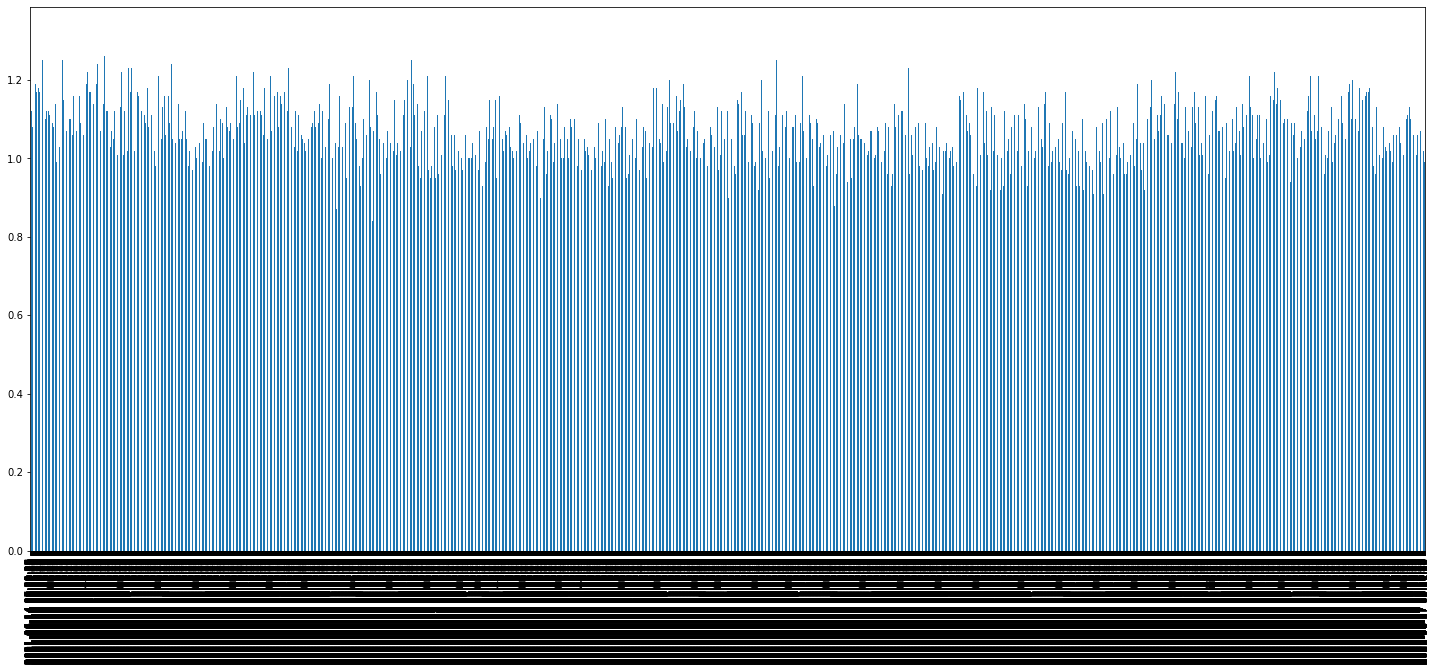

In [9]:
df['[SEQ2]  F0 Vibration'].resample('W').plot(kind='bar', figsize=(25, 10))

DATE
2021-06-13    AxesSubplot(0.125,0.125;0.775x0.755)
2021-06-20    AxesSubplot(0.125,0.125;0.775x0.755)
Freq: W-SUN, Name: [SEQ3]  F0 Vibration, dtype: object

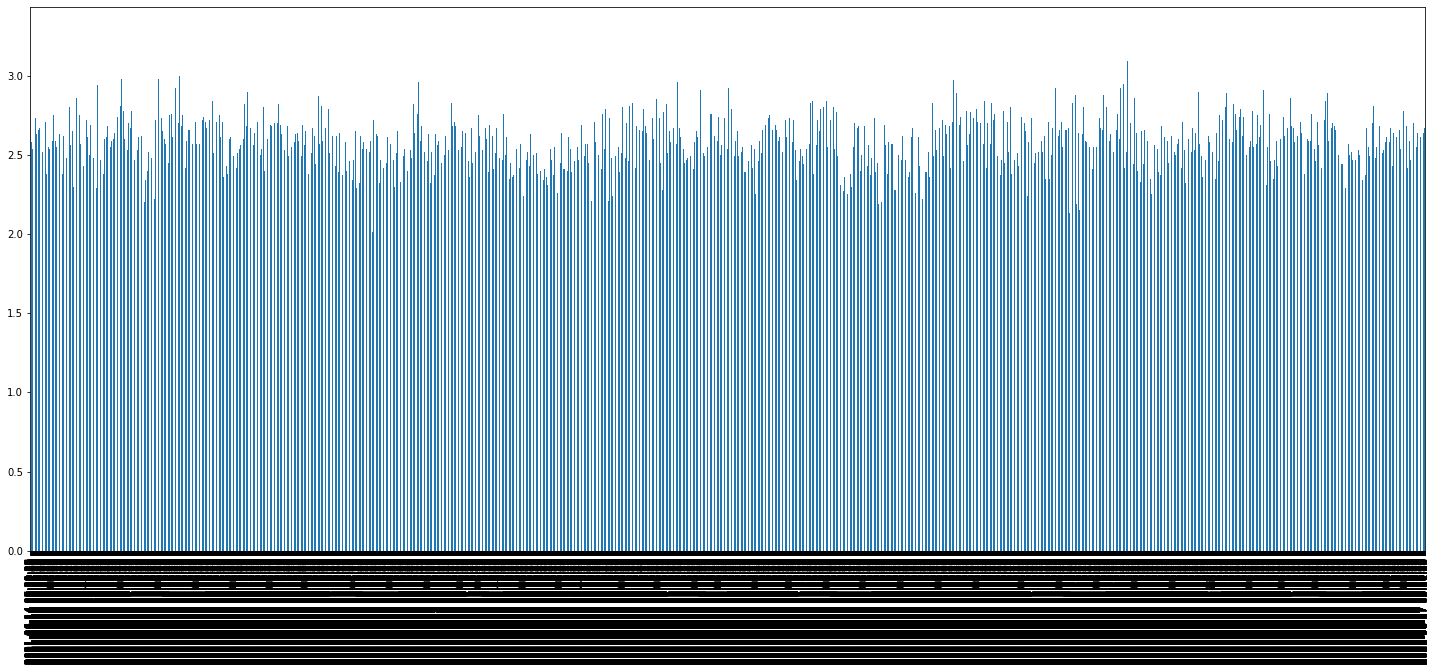

In [10]:
df['[SEQ3]  F0 Vibration'].resample('W').plot(kind='bar', figsize=(25, 10))

DATE
2021-06-13    AxesSubplot(0.125,0.125;0.775x0.755)
2021-06-20    AxesSubplot(0.125,0.125;0.775x0.755)
Freq: W-SUN, Name: [SEQ4]  F0 Vibration, dtype: object

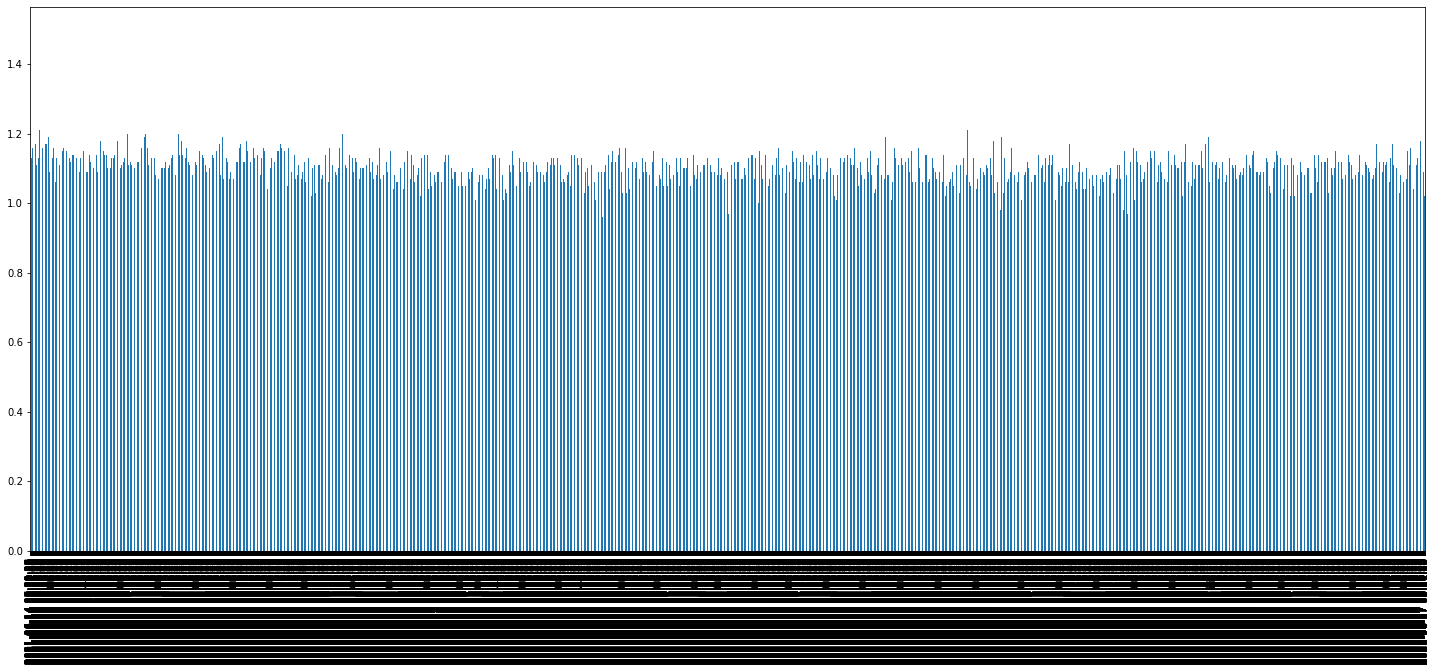

In [11]:
df['[SEQ4]  F0 Vibration'].resample('W').plot(kind='bar', figsize=(25, 10))

DATE
2021-06-13    AxesSubplot(0.125,0.125;0.775x0.755)
2021-06-20    AxesSubplot(0.125,0.125;0.775x0.755)
Freq: W-SUN, Name: [SEQ5]  F0 Vibration, dtype: object

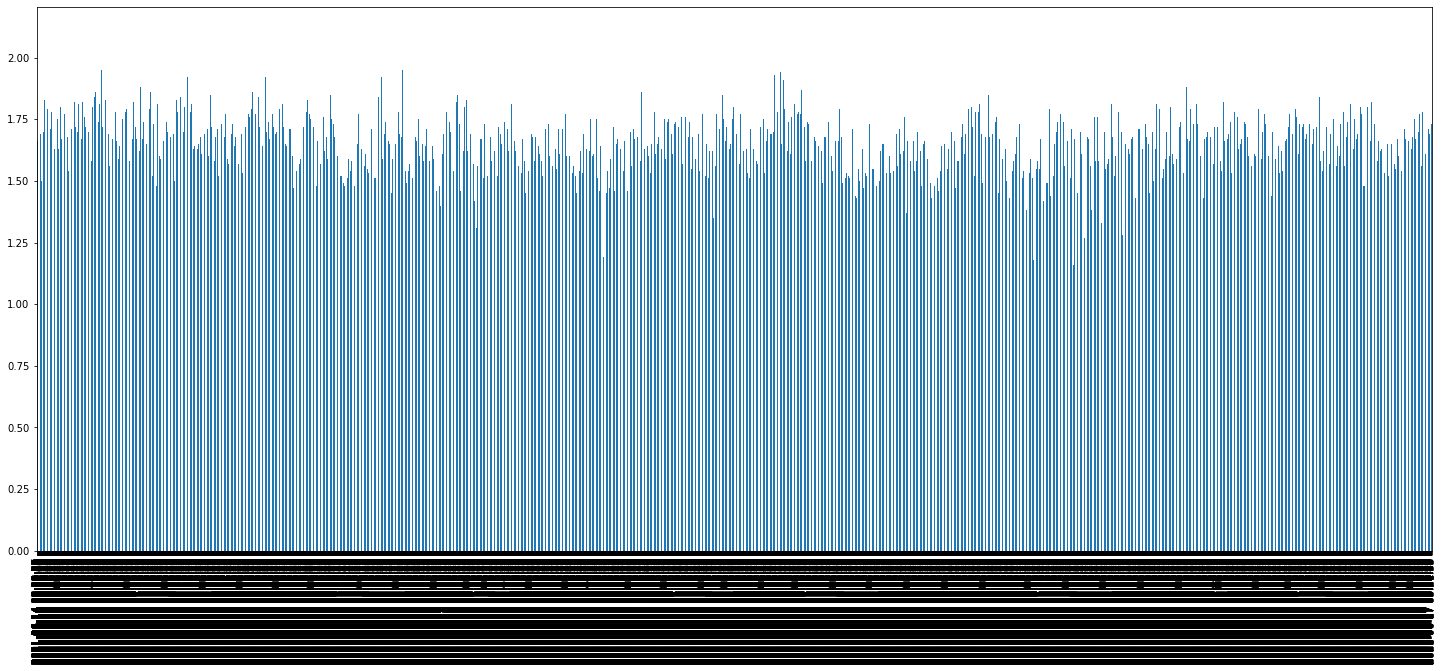

In [12]:
df['[SEQ5]  F0 Vibration'].resample('W').plot(kind='bar', figsize=(25, 10))

DATE
2021-06-13    AxesSubplot(0.125,0.125;0.775x0.755)
2021-06-20    AxesSubplot(0.125,0.125;0.775x0.755)
Freq: W-SUN, Name: [SEQ6]  F0 Vibration, dtype: object

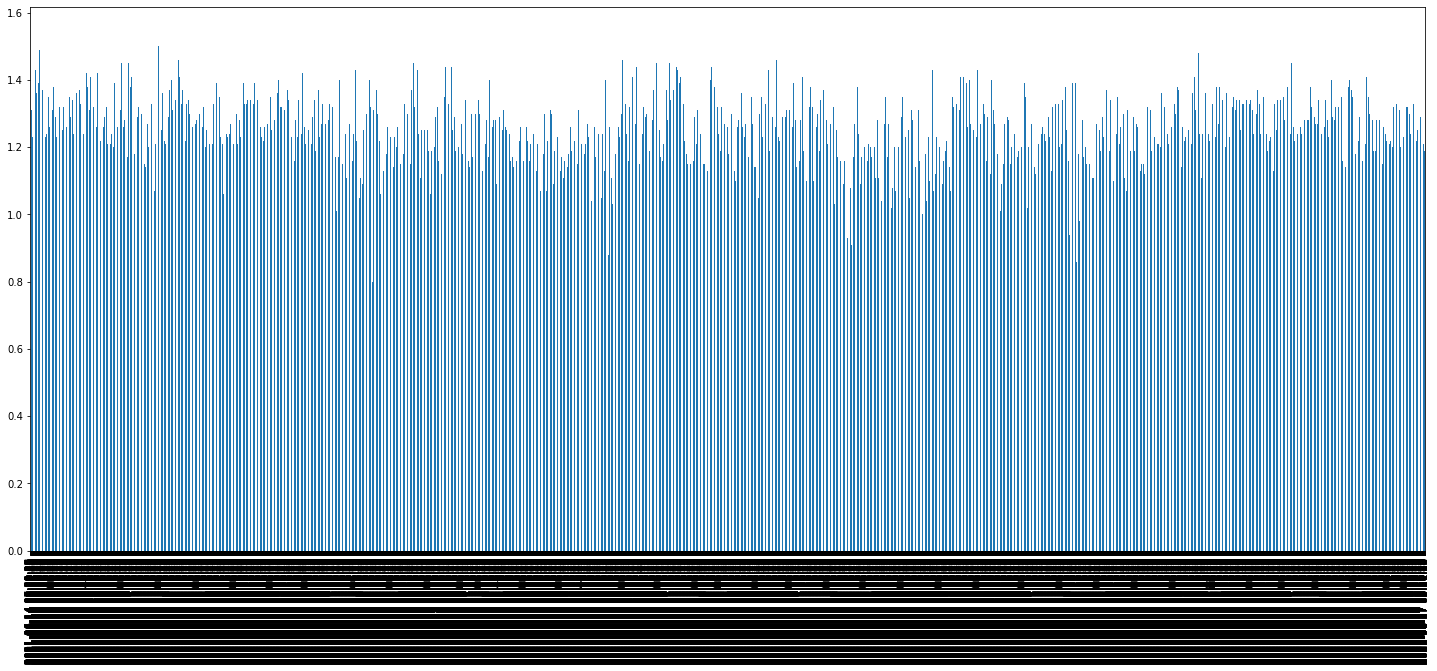

In [13]:
df['[SEQ6]  F0 Vibration'].resample('W').plot(kind='bar', figsize=(25, 10))

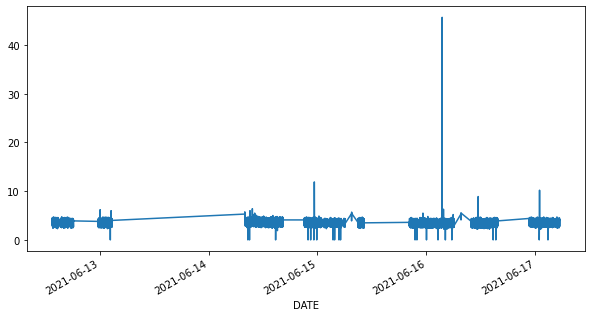

In [15]:
df['[SEQ2]  Noise THD1'].plot(figsize=(10, 5))

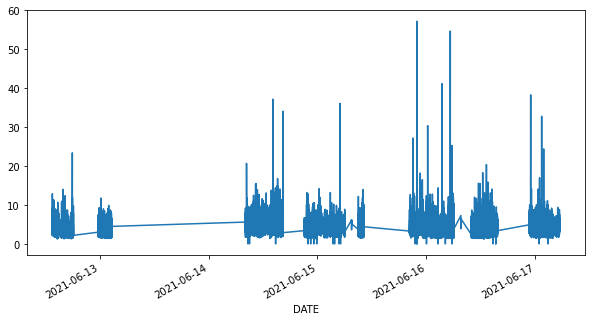

In [16]:
df['[SEQ3]  Noise THD1'].plot(figsize=(10, 5))

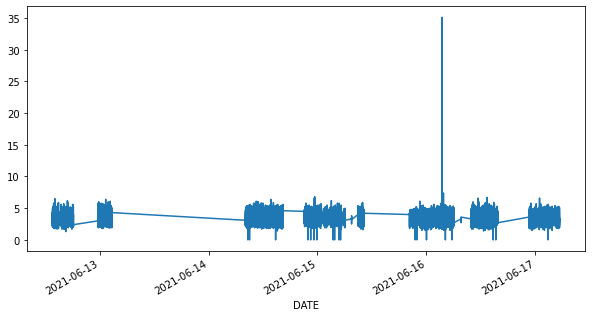

In [17]:
df['[SEQ4]  Noise THD1'].plot(figsize=(10, 5))

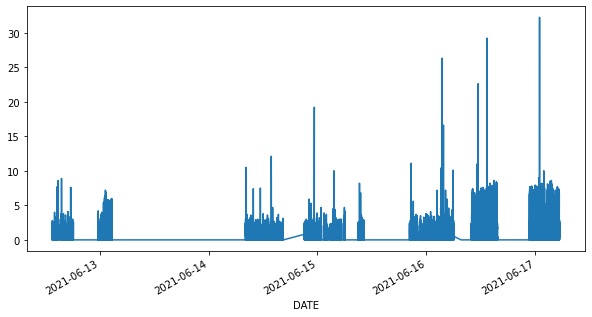

In [18]:
df['[SEQ2]  Noise Band1'].plot(figsize=(10, 5))

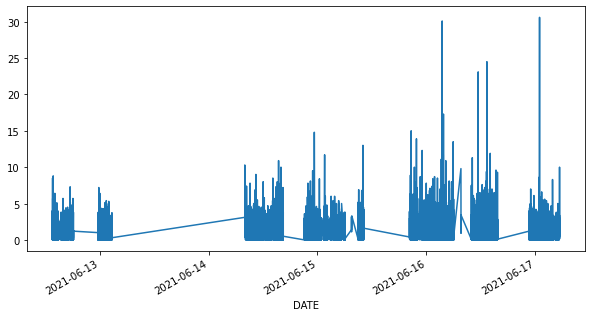

In [19]:
df['[SEQ3]  Noise Band1'].plot(figsize=(10, 5))

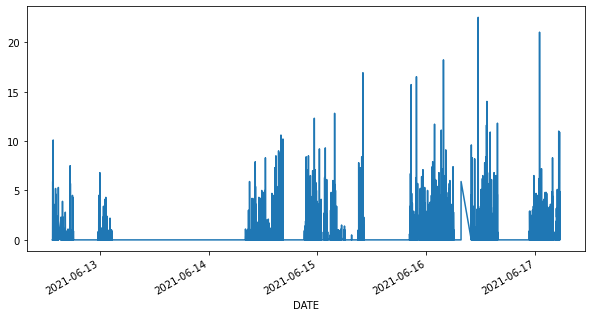

In [20]:
df['[SEQ4]  Noise Band1'].plot(figsize=(10, 5))

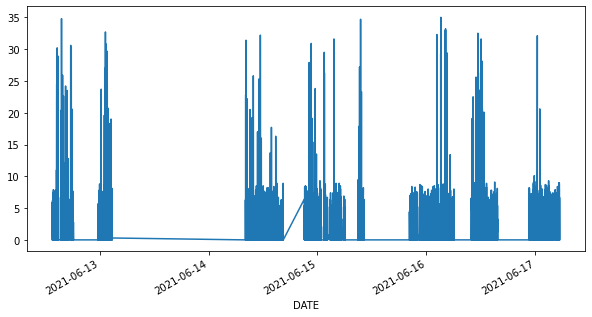

In [21]:
df['[SEQ2]  Noise Touch'].plot(figsize=(10, 5))

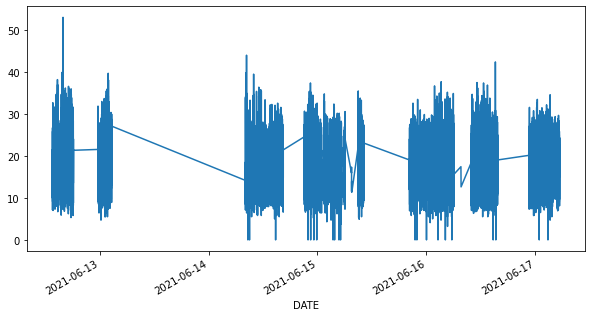

In [22]:
df['[SEQ3]  Noise Touch'].plot(figsize=(10, 5))

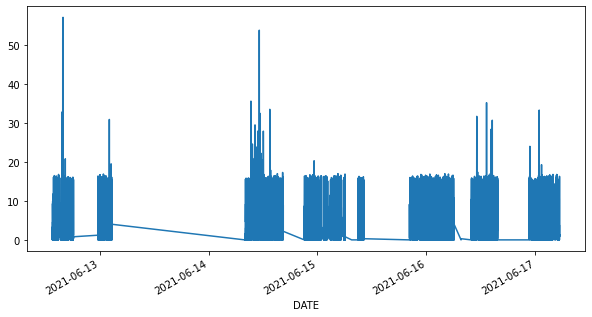

In [23]:
df['[SEQ4]  Noise Touch'].plot(figsize=(10, 5))

### 2. SEQ2 일별 평균 추이 (2021.06.12 ~ 2021.06.17)

## F0 Vibration

In [24]:
df2 = pd.concat([d1, d2, d3, d4, d5, d6, d7, d8, d9])
df2

,NUM,CH,[SEQ1] RisingTime,[SEQ1] FallingTime,[SEQ2] F0 Current,[SEQ2] F0 Vibration,[SEQ2] Noise Touch,[SEQ2] Noise THD1,[SEQ2] Noise Band1,[SEQ3] F0 Frequency,...,[SEQ4] Noise Band1,[SEQ5] F0 Vibration,[SEQ6] F0 Vibration,PASS/FAIL,DUT_ID,DATE,MODEL,MACHINE,REMARK,Unnamed: 26
0,1,CH1,4.5,19.3,291.8,1.03,0.0,4.1,0.0,169.6,...,0.0,1.57,1.20,PASS,NaN,2021-06-12 13:34:51,101040SB Alert_FILE HUBBLE them 165hz,M1,NaN,NaN
1,1,CH2,6.0,18.7,302.1,1.03,5.9,3.9,2.8,171.5,...,0.0,1.63,1.26,PASS,NaN,2021-06-12 13:34:53,101040SB Alert_FILE HUBBLE them 165hz,M1,NaN,NaN
2,1,CH3,5.6,15.6,309.3,0.95,0.0,3.0,0.0,174.2,...,0.0,1.43,1.04,PASS,NaN,2021-06-12 13:34:55,101040SB Alert_FILE HUBBLE them 165hz,M1,NaN,NaN
3,1,CH4,5.5,16.2,297.9,1.06,0.0,3.8,0.0,169.3,...,0.0,1.55,1.13,PASS,NaN,2021-06-12 13:34:58,101040SB Alert_FILE HUBBLE them 165hz,M1,NaN,NaN
4,1,CH6,5.4,16.5,305.3,1.06,0.0,4.2,0.0,167.9,...,0.0,1.57,1.13,PASS,NaN,2021-06-12 13:35:00,101040SB Alert_FILE HUBBLE them 165hz,M1,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3622,725,CH4,6.1,18.4,301.8,1.11,0.0,4.0,0.0,169.5,...,0.0,1.75,1.37,PASS,NaN,2021-06-17 05:21:40,101040SB Alert_FILE HUBBLE them 165hz,M1,NaN,NaN
3623,725,CH6,6.4,24.2,301.3,1.05,6.3,3.8,2.8,170.1,...,0.0,1.71,1.31,PASS,NaN,2021-06-17 05:21:45,101040SB Alert_FILE HUBBLE them 165hz,M1,NaN,NaN
3624,726,CH1,4.9,23.8,291.4,1.09,4.2,4.1,2.0,169.7,...,4.9,1.77,1.37,PASS,NaN,2021-06-17 05:21:47,101040SB Alert_FILE HUBBLE them 165hz,M1,NaN,NaN
3625,726,CH2,6.3,20.4,299.9,1.09,0.0,3.9,0.0,169.7,...,0.0,1.73,1.30,PASS,NaN,2021-06-17 05:21:52,101040SB Alert_FILE HUBBLE them 165hz,M1,NaN,NaN


In [25]:
df2['DATE'] = pd.to_datetime(df2['DATE']).dt.normalize()
df2.head()

,NUM,CH,[SEQ1] RisingTime,[SEQ1] FallingTime,[SEQ2] F0 Current,[SEQ2] F0 Vibration,[SEQ2] Noise Touch,[SEQ2] Noise THD1,[SEQ2] Noise Band1,[SEQ3] F0 Frequency,...,[SEQ4] Noise Band1,[SEQ5] F0 Vibration,[SEQ6] F0 Vibration,PASS/FAIL,DUT_ID,DATE,MODEL,MACHINE,REMARK,Unnamed: 26
0,1,CH1,4.5,19.3,291.8,1.03,0.0,4.1,0.0,169.6,...,0.0,1.57,1.20,PASS,NaN,2021-06-12,101040SB Alert_FILE HUBBLE them 165hz,M1,NaN,NaN
1,1,CH2,6.0,18.7,302.1,1.03,5.9,3.9,2.8,171.5,...,0.0,1.63,1.26,PASS,NaN,2021-06-12,101040SB Alert_FILE HUBBLE them 165hz,M1,NaN,NaN
2,1,CH3,5.6,15.6,309.3,0.95,0.0,3.0,0.0,174.2,...,0.0,1.43,1.04,PASS,NaN,2021-06-12,101040SB Alert_FILE HUBBLE them 165hz,M1,NaN,NaN
3,1,CH4,5.5,16.2,297.9,1.06,0.0,3.8,0.0,169.3,...,0.0,1.55,1.13,PASS,NaN,2021-06-12,101040SB Alert_FILE HUBBLE them 165hz,M1,NaN,NaN
4,1,CH6,5.4,16.5,305.3,1.06,0.0,4.2,0.0,167.9,...,0.0,1.57,1.13,PASS,NaN,2021-06-12,101040SB Alert_FILE HUBBLE them 165hz,M1,NaN,NaN


In [26]:
df2.set_index('DATE', drop=True, inplace=True)
df2.head()

,NUM,CH,[SEQ1] RisingTime,[SEQ1] FallingTime,[SEQ2] F0 Current,[SEQ2] F0 Vibration,[SEQ2] Noise Touch,[SEQ2] Noise THD1,[SEQ2] Noise Band1,[SEQ3] F0 Frequency,...,[SEQ4] Noise THD1,[SEQ4] Noise Band1,[SEQ5] F0 Vibration,[SEQ6] F0 Vibration,PASS/FAIL,DUT_ID,MODEL,MACHINE,REMARK,Unnamed: 26
DATE,,,,,,,,,,,,,,,,,,,,,
2021-06-12,1,CH1,4.5,19.3,291.8,1.03,0.0,4.1,0.0,169.6,...,2.7,0.0,1.57,1.20,PASS,NaN,101040SB Alert_FILE HUBBLE them 165hz,M1,NaN,NaN
2021-06-12,1,CH2,6.0,18.7,302.1,1.03,5.9,3.9,2.8,171.5,...,3.4,0.0,1.63,1.26,PASS,NaN,101040SB Alert_FILE HUBBLE them 165hz,M1,NaN,NaN
2021-06-12,1,CH3,5.6,15.6,309.3,0.95,0.0,3.0,0.0,174.2,...,2.6,0.0,1.43,1.04,PASS,NaN,101040SB Alert_FILE HUBBLE them 165hz,M1,NaN,NaN
2021-06-12,1,CH4,5.5,16.2,297.9,1.06,0.0,3.8,0.0,169.3,...,3.3,0.0,1.55,1.13,PASS,NaN,101040SB Alert_FILE HUBBLE them 165hz,M1,NaN,NaN
2021-06-12,1,CH6,5.4,16.5,305.3,1.06,0.0,4.2,0.0,167.9,...,4.4,0.0,1.57,1.13,PASS,NaN,101040SB Alert_FILE HUBBLE them 165hz,M1,NaN,NaN


In [27]:
df2_mean = df2.resample(rule='D').mean()
df2_mean

,NUM,[SEQ1] RisingTime,[SEQ1] FallingTime,[SEQ2] F0 Current,[SEQ2] F0 Vibration,[SEQ2] Noise Touch,[SEQ2] Noise THD1,[SEQ2] Noise Band1,[SEQ3] F0 Frequency,[SEQ3] F0 Vibration,...,[SEQ3] Noise Band1,[SEQ4] F0 Vibration,[SEQ4] Noise Touch,[SEQ4] Noise THD1,[SEQ4] Noise Band1,[SEQ5] F0 Vibration,[SEQ6] F0 Vibration,DUT_ID,REMARK,Unnamed: 26
DATE,,,,,,,,,,,,,,,,,,,,,
2021-06-12,209.914184,5.365952,17.610489,300.818117,1.019607,0.817561,3.725427,0.284426,171.988955,2.455658,...,1.104966,1.102086,4.234843,3.511839,0.124553,1.545662,1.165554,NaN,NaN,NaN
2021-06-13,221.199885,5.349512,17.325503,300.092188,1.051436,1.078403,3.800460,0.740379,170.620620,2.452596,...,0.985985,1.108788,4.346123,3.568179,0.134808,1.586726,1.192349,NaN,NaN,NaN
2021-06-14,303.343487,5.527222,19.392755,300.582670,1.076290,0.749165,3.838223,0.208443,169.308310,2.545295,...,1.266065,1.101635,4.584253,3.561999,0.169925,1.658597,1.259017,NaN,NaN,NaN
2021-06-15,380.917515,5.610810,19.473474,300.005451,1.054004,0.727416,3.684048,0.245621,169.901036,2.561130,...,1.238645,1.091019,4.164317,3.555432,0.167206,1.640431,1.247186,NaN,NaN,NaN
2021-06-16,529.696173,5.611565,19.016093,299.903548,1.047610,0.689598,3.679935,0.575648,170.397336,2.560637,...,1.343630,1.094391,4.345810,3.506430,0.179753,1.619959,1.226990,NaN,NaN,NaN
2021-06-17,447.800072,5.642934,19.177059,300.132219,1.075437,0.780151,3.766163,0.951241,169.667062,2.582197,...,1.246063,1.102808,4.277670,3.490579,0.168357,1.663297,1.266904,NaN,NaN,NaN


In [28]:
SEQ2_Vibra = pd.DataFrame(df2_mean, columns= ['[SEQ2]  F0 Vibration'])
SEQ2_Vibra

,[SEQ2] F0 Vibration
DATE,
2021-06-12,1.019607
2021-06-13,1.051436
2021-06-14,1.076290
2021-06-15,1.054004
2021-06-16,1.047610
2021-06-17,1.075437


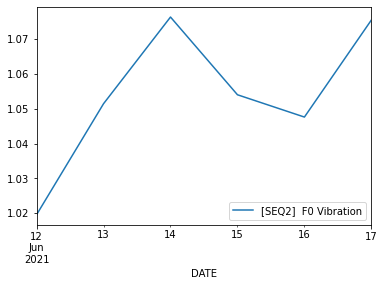

In [29]:
ax = SEQ2_Vibra.plot()
plt.show()

## Noise

In [31]:
SEQ2_noise = pd.DataFrame(df2_mean, columns= ['[SEQ2]  Noise Touch'])
SEQ2_noise

,[SEQ2] Noise Touch
DATE,
2021-06-12,0.817561
2021-06-13,1.078403
2021-06-14,0.749165
2021-06-15,0.727416
2021-06-16,0.689598
2021-06-17,0.780151


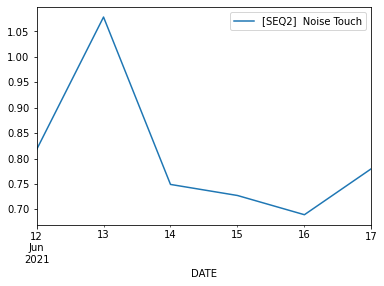

In [33]:
ax = SEQ2_noise.plot()
plt.show()

##### SEQ2인 sweep 주파수 소음의 추이(Noise Touch)를 확인해보았을 때, 0.7부터 1.05까지 나타남을 알 수 있다.
##### 특히, 2021.6.13일에 가장 높은 Noise Touch 수치

In [36]:
SEQ2_noise2 = pd.DataFrame(df2_mean, columns= ['[SEQ2]  Noise THD1'])
SEQ2_noise2

,[SEQ2] Noise THD1
DATE,
2021-06-12,3.725427
2021-06-13,3.800460
2021-06-14,3.838223
2021-06-15,3.684048
2021-06-16,3.679935
2021-06-17,3.766163


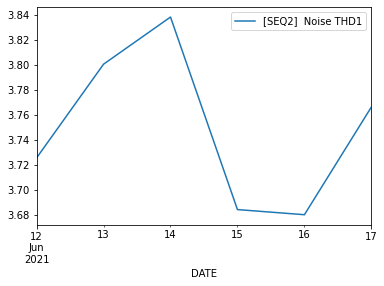

In [37]:
ax = SEQ2_noise2.plot()
plt.show()

In [39]:
SEQ3_noise3 = pd.DataFrame(df2_mean, columns= ['[SEQ2]  Noise Band1'])
SEQ2_noise3

,[SEQ2] Noise Band1
DATE,
2021-06-12,0.284426
2021-06-13,0.740379
2021-06-14,0.208443
2021-06-15,0.245621
2021-06-16,0.575648
2021-06-17,0.951241


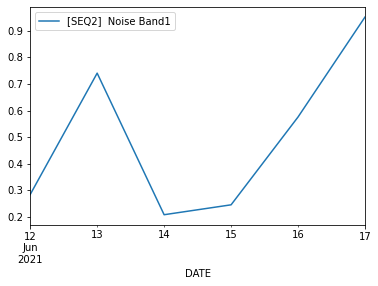

In [41]:
ax = SEQ2_noise3.plot()
plt.show()

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 27564 entries, 2021-06-12 13:34:51 to 2021-06-17 05:21:55
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   NUM                   27564 non-null  int64  
 1   CH                    27564 non-null  object 
 2   [SEQ1]  RisingTime    27564 non-null  float64
 3   [SEQ1]  FallingTime   27564 non-null  float64
 4   [SEQ2]  F0 Current    27564 non-null  float64
 5   [SEQ2]  F0 Vibration  27564 non-null  float64
 6   [SEQ2]  Noise Touch   27564 non-null  float64
 7   [SEQ2]  Noise THD1    27564 non-null  float64
 8   [SEQ2]  Noise Band1   27564 non-null  float64
 9   [SEQ3]  F0 Frequency  27564 non-null  float64
 10  [SEQ3]  F0 Vibration  27564 non-null  float64
 11  [SEQ3]  Noise Touch   27564 non-null  float64
 12  [SEQ3]  Noise THD1    27564 non-null  float64
 13  [SEQ3]  Noise Band1   27564 non-null  float64
 14  [SEQ4]  F0 Vibration  27564 non-nul

### 3. SEQ3 일별 평균 추이 (2021.06.12 ~ 2021.06.17)

### F0 Vibration

In [42]:
SEQ3_Vibra = pd.DataFrame(df2_mean, columns= ['[SEQ3]  F0 Vibration'])
SEQ3_Vibra

,[SEQ3] F0 Vibration
DATE,
2021-06-12,2.455658
2021-06-13,2.452596
2021-06-14,2.545295
2021-06-15,2.561130
2021-06-16,2.560637
2021-06-17,2.582197


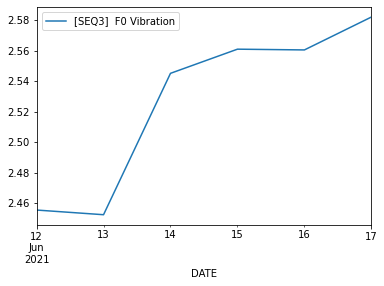

In [43]:
ax = SEQ3_Vibra.plot()
plt.show()

## Noise

In [44]:
SEQ3_noise = pd.DataFrame(df2_mean, columns= ['[SEQ3]  Noise Touch'])
SEQ3_noise

,[SEQ3] Noise Touch
DATE,
2021-06-12,18.788836
2021-06-13,19.139230
2021-06-14,17.919341
2021-06-15,18.323401
2021-06-16,18.365512
2021-06-17,18.150126


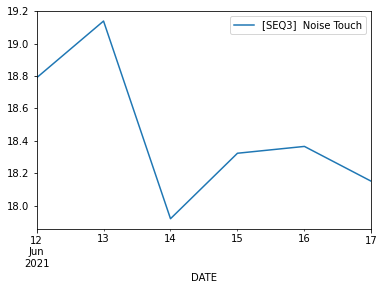

In [45]:
ax = SEQ3_noise.plot()
plt.show()

In [47]:
SEQ3_noise2 = pd.DataFrame(df2_mean, columns= ['[SEQ3]  Noise THD1'])
SEQ3_noise2

,[SEQ3] Noise THD1
DATE,
2021-06-12,3.968455
2021-06-13,3.812636
2021-06-14,4.675987
2021-06-15,4.164117
2021-06-16,3.895229
2021-06-17,4.048652


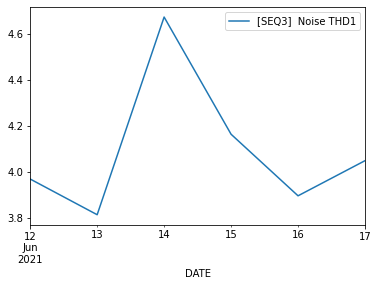

In [48]:
ax = SEQ3_noise2.plot()
plt.show()

In [49]:
SEQ3_noise3 = pd.DataFrame(df2_mean, columns= ['[SEQ3]  Noise Band1'])
SEQ3_noise3

,[SEQ3] Noise Band1
DATE,
2021-06-12,1.104966
2021-06-13,0.985985
2021-06-14,1.266065
2021-06-15,1.238645
2021-06-16,1.343630
2021-06-17,1.246063


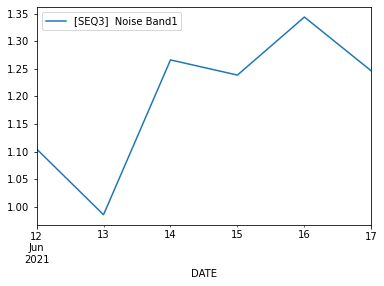

In [50]:
ax = SEQ3_noise3.plot()
plt.show()

### 4. SEQ4 일별 평균 추이 (2021.06.12 ~ 2021.06.17)

### F0 Vibration

In [52]:
SEQ4_Vibra = pd.DataFrame(df2_mean, columns= ['[SEQ4]  F0 Vibration'])
SEQ4_Vibra

,[SEQ4] F0 Vibration
DATE,
2021-06-12,1.102086
2021-06-13,1.108788
2021-06-14,1.101635
2021-06-15,1.091019
2021-06-16,1.094391
2021-06-17,1.102808


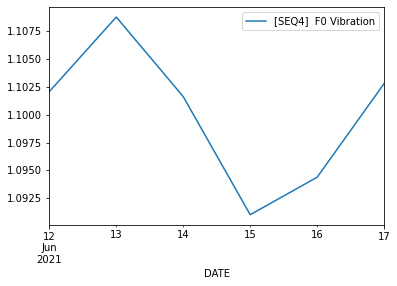

In [53]:
ax = SEQ4_Vibra.plot()
plt.show()

### Noise

In [54]:
SEQ4_noise = pd.DataFrame(df2_mean, columns= ['[SEQ4]  Noise Touch'])
SEQ4_noise

,[SEQ4] Noise Touch
DATE,
2021-06-12,4.234843
2021-06-13,4.346123
2021-06-14,4.584253
2021-06-15,4.164317
2021-06-16,4.345810
2021-06-17,4.277670


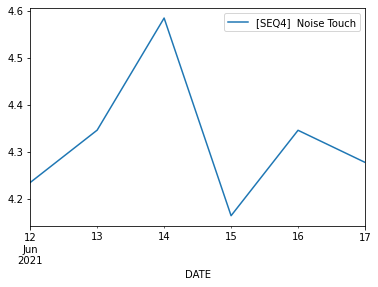

In [55]:
ax = SEQ4_noise.plot()
plt.show()

In [58]:
SEQ4_noise2 = pd.DataFrame(df2_mean, columns= ['[SEQ4]  Noise THD1'])
SEQ4_noise2

,[SEQ4] Noise THD1
DATE,
2021-06-12,3.511839
2021-06-13,3.568179
2021-06-14,3.561999
2021-06-15,3.555432
2021-06-16,3.506430
2021-06-17,3.490579


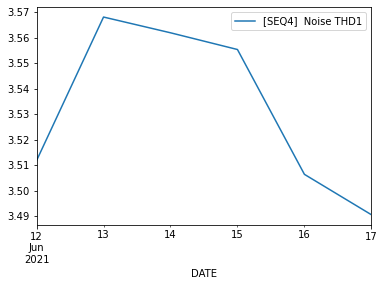

In [59]:
ax = SEQ4_noise2.plot()
plt.show()

In [60]:
SEQ4_noise3 = pd.DataFrame(df2_mean, columns= ['[SEQ4]  Noise Band1'])
SEQ4_noise3

,[SEQ4] Noise Band1
DATE,
2021-06-12,0.124553
2021-06-13,0.134808
2021-06-14,0.169925
2021-06-15,0.167206
2021-06-16,0.179753
2021-06-17,0.168357


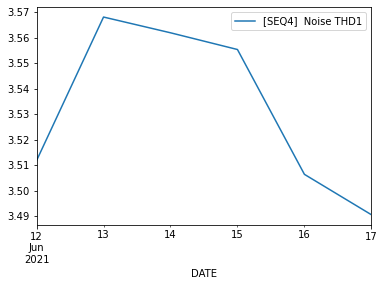

In [61]:
ax = SEQ4_noise2.plot()
plt.show()

### 5. SEQ5 일별 평균 추이 (2021.06.12 ~ 2021.06.17)

### F0 Vibration

In [63]:
SEQ5_Vibra = pd.DataFrame(df2_mean, columns= ['[SEQ5]  F0 Vibration'])
SEQ5_Vibra

,[SEQ5] F0 Vibration
DATE,
2021-06-12,1.545662
2021-06-13,1.586726
2021-06-14,1.658597
2021-06-15,1.640431
2021-06-16,1.619959
2021-06-17,1.663297


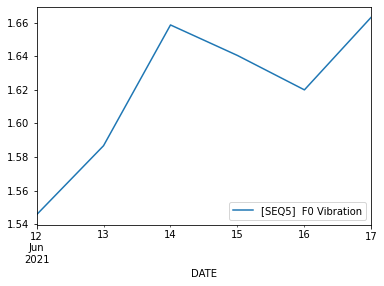

In [64]:
ax = SEQ5_Vibra.plot()
plt.show()

### 6. SEQ6 일별 평균 추이 (2021.06.12 ~ 2021.06.17)

### F0 Vibration

In [67]:
SEQ6_Vibra = pd.DataFrame(df2_mean, columns= ['[SEQ6]  F0 Vibration'])
SEQ6_Vibra

,[SEQ6] F0 Vibration
DATE,
2021-06-12,1.165554
2021-06-13,1.192349
2021-06-14,1.259017
2021-06-15,1.247186
2021-06-16,1.226990
2021-06-17,1.266904


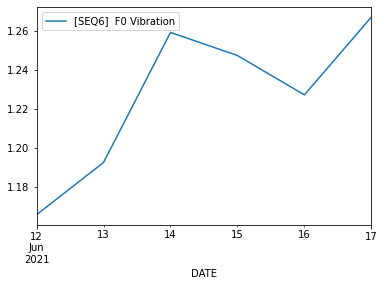

In [68]:
ax = SEQ6_Vibra.plot()
plt.show()

##### 특정 기간에서 SEQ2, SEQ3, SEQ4, SEQ5, SEQ6의 평균 진동 폭을 확인해본 결과,
##### SEQ2(sweep주파수) : 1.02 ~ 1.07
##### SEQ3(고정 주파수) : 2.46 ~ 2.58 (17일까지 조금씩 증가)
##### SEQ4(고정 주파수) : 1.0925 ~ 1.1075
##### SEQ5(고정 주파수) : 1.54 ~ 1.66
##### SEQ6(고정 주파수) : 1.18 ~ 1.26

##### 6/12~6/17까지 데이터의 진동수가 급격하게 늘어나거나 줄어든 모습은 확인되지 않았음을 알 수 있다.

## 상관분석

### 1. SEQ2 상관분석

In [8]:
SEQ2_df = df[['[SEQ2]  F0 Current', '[SEQ2]  F0 Vibration', '[SEQ2]  Noise Touch', '[SEQ2]  Noise THD1', '[SEQ2]  Noise Band1']]

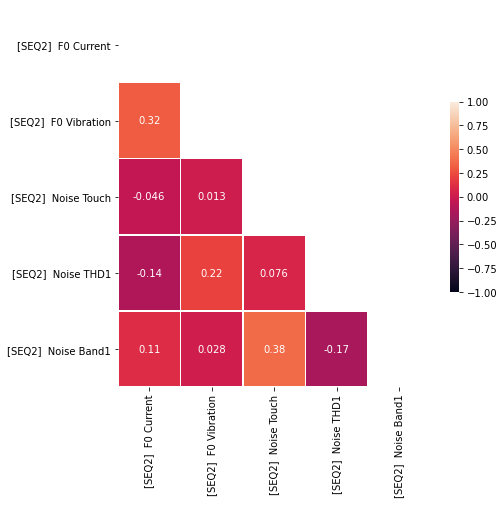

In [76]:
data = SEQ2_df.corr()
fig, ax = plt.subplots( figsize=(7,7) )

mask = np.zeros_like(data, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

sns.heatmap(data,
            annot = True,   
            mask=mask,     
            linewidths=.5,  
            cbar_kws={"shrink": .5},
            vmin = -1,vmax = 1  
           )  
plt.show()

##### 상관분석을 통해, 알아내고자 하는 것 : 고정 주파수 Vibration과 Noise의 선형관계

##### [SEQ2]  F0 Vibration과 Noise Touch의 상관계수 : 0.013
##### [SEQ2]  F0 Vibration과 Noise THD1의 상관계수 : 0.22
##### [SEQ2]  F0 Vibration과 Noise Band1의 상관계수 : 0.028

#### 결론 : 
##### 양의 상관관계를 띄며, 둘의 선형관계는 거의 없다고 할 수 있다.
#####        Vibration이 증가한다고해서, Nosie의 값이 증가하지 않는다. 라고 할 수 있겠지만.
##### 하지만, 상관관계를 띈다, 안띈다 라고 하기 전 p값을 확인해야할 것이다.
##### 아래와 같이 p값이 3.39이므로 상관관계 여부를 확인할 필요가 없다.!

In [12]:
import scipy.stats as stats
stats.pearsonr(x = SEQ2_df['[SEQ2]  F0 Vibration'], y = SEQ2_df['[SEQ2]  Noise Band1'])

(0.02797601477160443, 3.3943289766850865e-06)

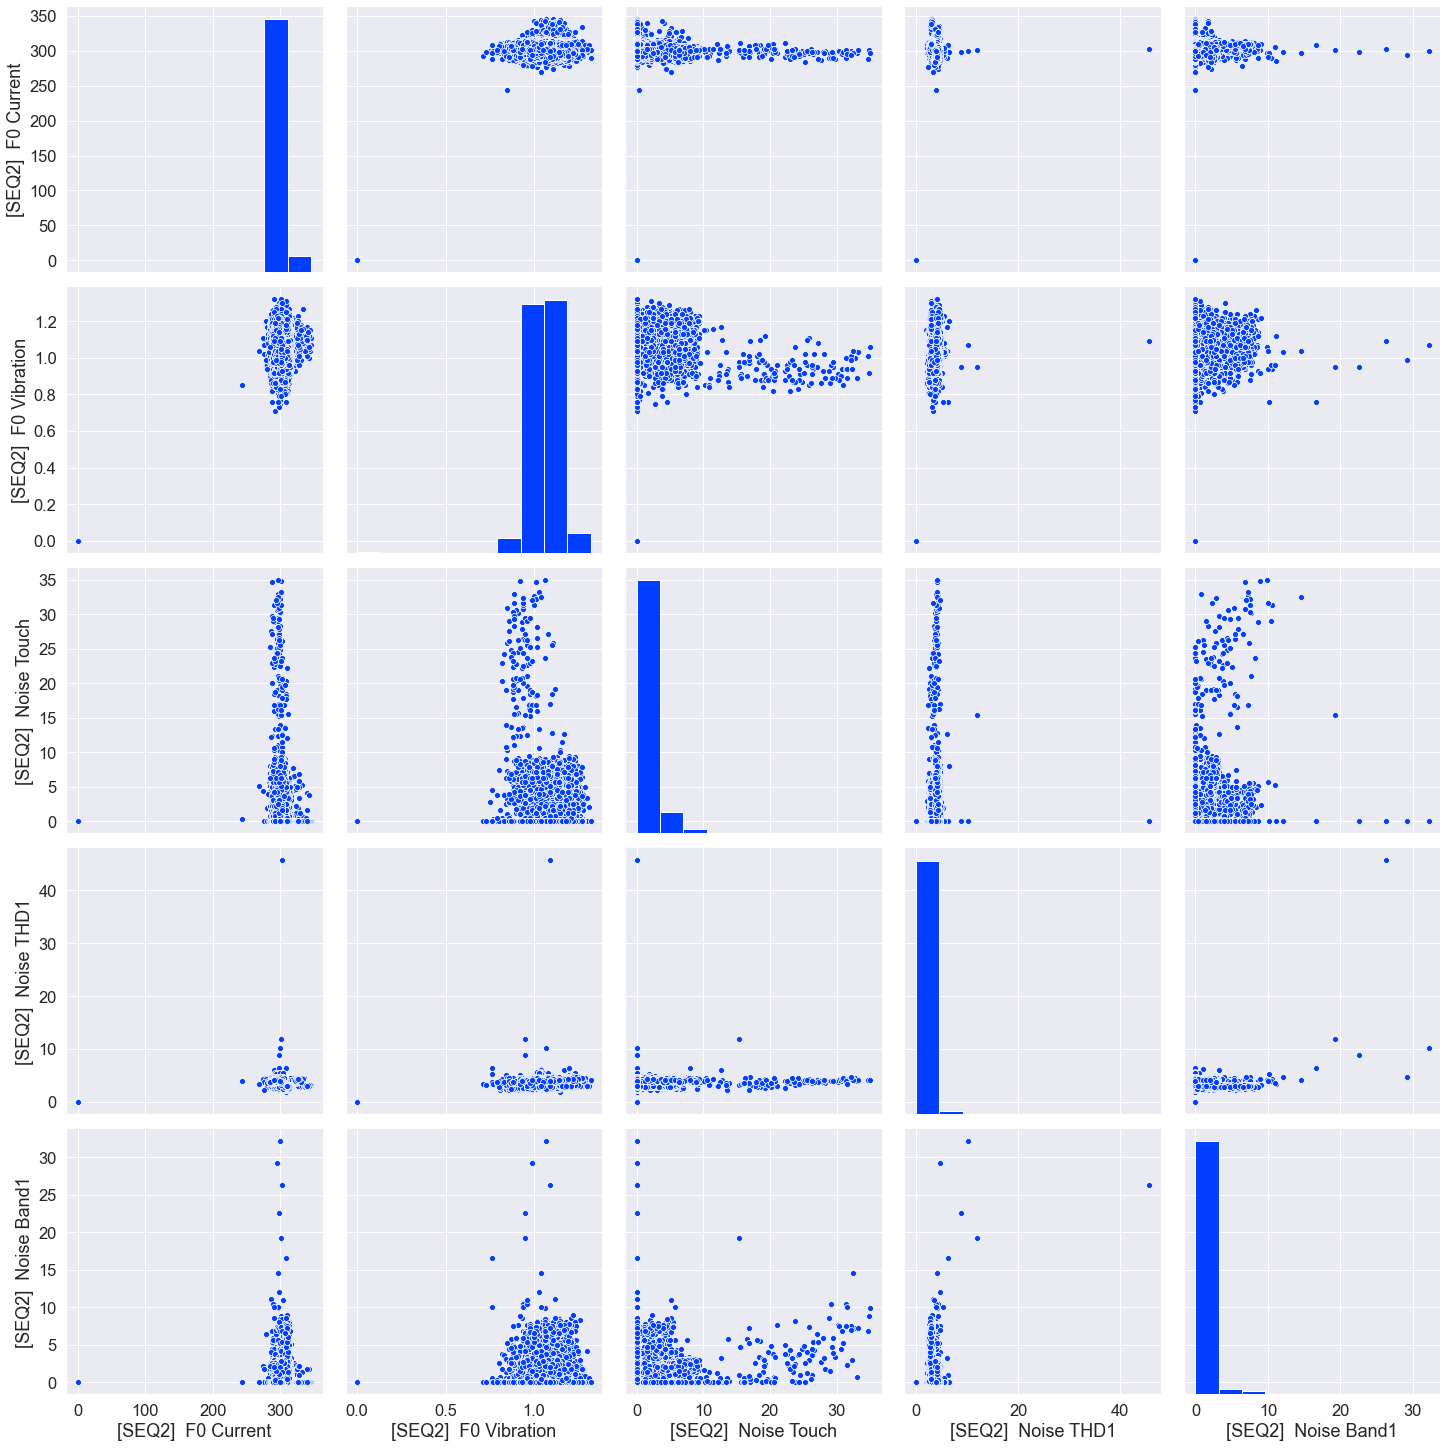

In [96]:
plt.style.use('dark_background') 
sns.set(style="darkgrid",palette="bright", font_scale=1.5) 
sns.pairplot(SEQ2_df, height=4)

### 2. SEQ3 상관분석

In [13]:
SEQ3_df = df[['[SEQ3]  F0 Vibration', '[SEQ3]  Noise Touch', '[SEQ3]  Noise THD1', '[SEQ3]  Noise Band1']]

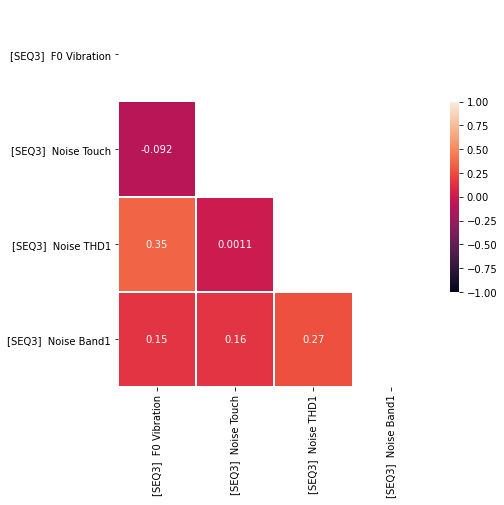

In [80]:
data = SEQ3_df.corr()
fig, ax = plt.subplots( figsize=(7,7) )

mask = np.zeros_like(data, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

sns.heatmap(data,
            annot = True,   
            mask=mask,     
            linewidths=.5,  
            cbar_kws={"shrink": .5},
            vmin = -1,vmax = 1  
           )  
plt.show()

##### 고정 주파수 Vibration과 Noise의 선형관계

##### [SEQ3]  F0 Vibration과 Noise Touch의 상관계수 : -0.092
##### [SEQ3]  F0 Vibration과 Noise THD1의 상관계수 : 0.35
##### [SEQ3]  F0 Vibration과 Noise Band1의 상관계수 : 0.15

#### 결론 : 
##### -> [SEQ3]  F0 Vibration과 Noise Touch의 상관계수는 음의 상관관계를 띄며, 
##### 둘의 선형관계는 거의 없다고 할 수 있다.
##### -> [SEQ3]  F0 Vibration과 Noise THD1, Noise Band1의 상관계수는 양의 상관관계를 띈다. 
#####  이때, Noise THD1과는 약한 선형적인 관계를 갖는다고 할 수 있으며,
##### Noise Band1와의 선형관계는 거의 없다고 할 수 있다.

In [17]:
import scipy.stats as stats
stats.pearsonr(x = SEQ3_df['[SEQ3]  F0 Vibration'], y = SEQ3_df['[SEQ3]  Noise THD1'])

(0.34660499545079365, 0.0)

In [22]:
import scipy.stats as stats
stats.pearsonr(x = SEQ3_df['[SEQ3]  F0 Vibration'], y = SEQ3_df['[SEQ3]  Noise Touch'])

(-0.09168477126141761, 1.5645836103338328e-52)

In [23]:
import scipy.stats as stats
stats.pearsonr(x = SEQ3_df['[SEQ3]  F0 Vibration'], y = SEQ3_df['[SEQ3]  Noise Band1'])

(0.15404058984488317, 5.835435445353502e-146)

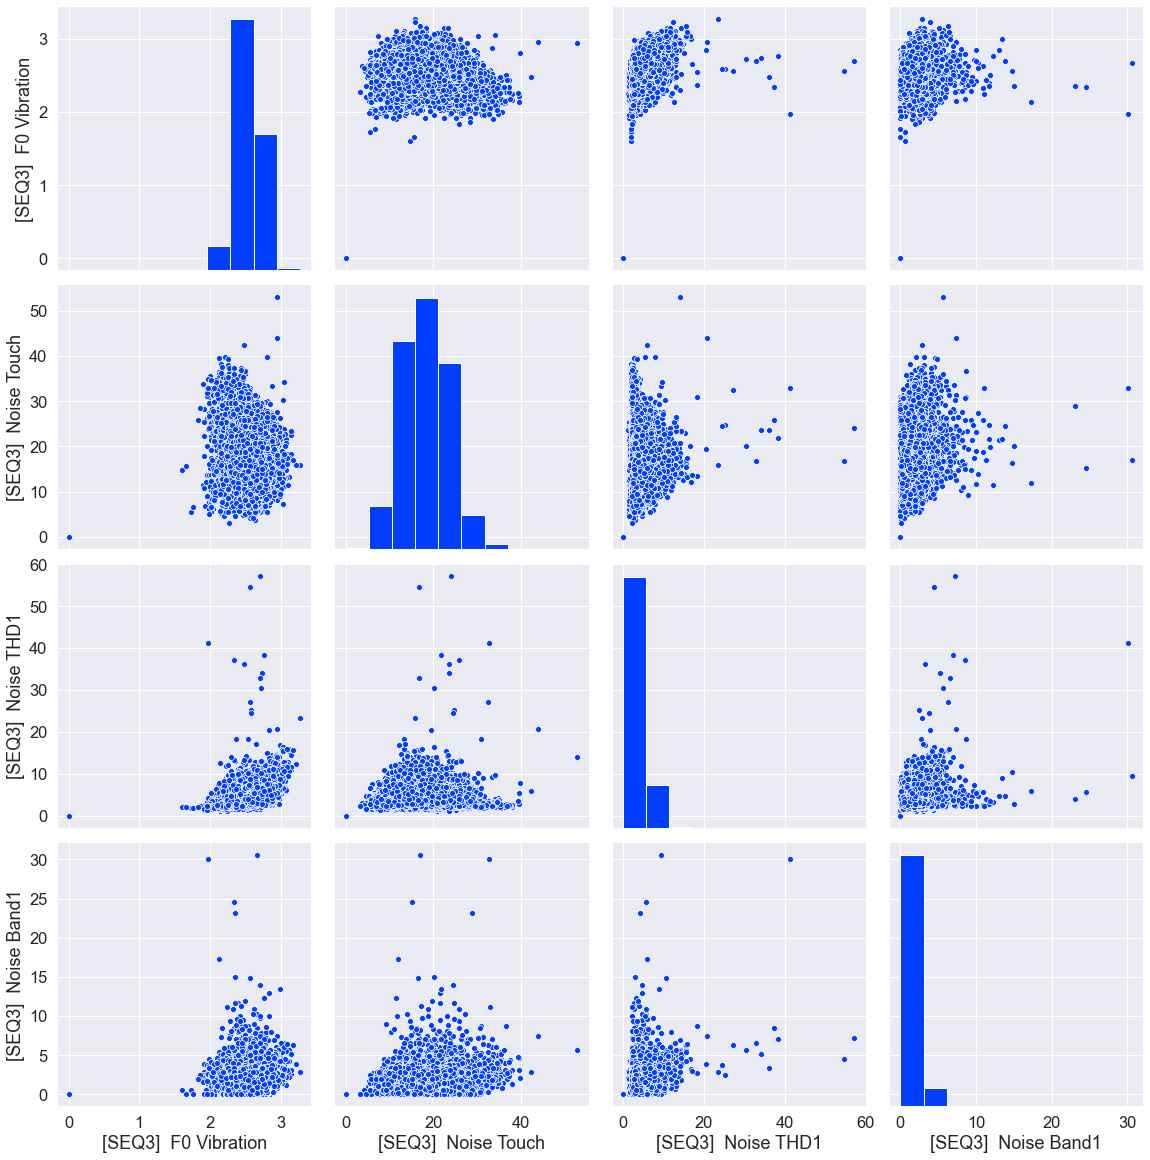

In [89]:
plt.style.use('dark_background') 
sns.set(style="darkgrid",palette="bright", font_scale=1.5) 
sns.pairplot(SEQ3_df, height=4)

### 3. SEQ4 상관분석

In [18]:
SEQ4_df = df[['[SEQ4]  F0 Vibration', '[SEQ4]  Noise Touch', '[SEQ4]  Noise THD1', '[SEQ4]  Noise Band1']]

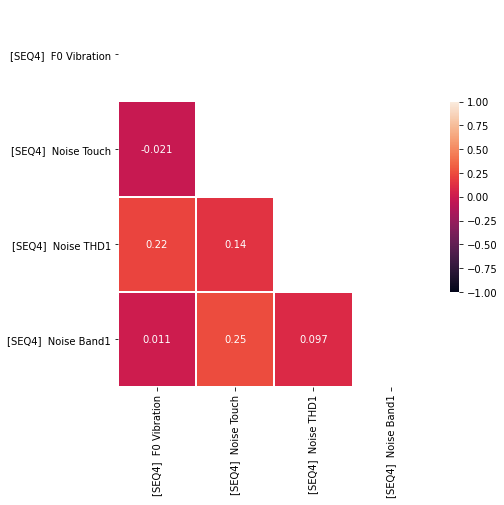

In [86]:
data = SEQ4_df.corr()
fig, ax = plt.subplots( figsize=(7,7) )

mask = np.zeros_like(data, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

sns.heatmap(data,
            annot = True,   
            mask=mask,     
            linewidths=.5,  
            cbar_kws={"shrink": .5},
            vmin = -1,vmax = 1  
           )  
plt.show()

##### 고정 주파수 Vibration과 Noise의 선형관계

##### [SEQ4]  F0 Vibration과 Noise Touch의 상관계수 : -0.021
##### [SEQ4]  F0 Vibration과 Noise THD1의 상관계수 : 0.22
##### [SEQ4]  F0 Vibration과 Noise Band1의 상관계수 : 0.011

#### 결론 : 
##### -> [SEQ4]  F0 Vibration과 Noise Touch의 상관계수는 음의 상관관계를 띄며, 
##### 둘의 선형관계는 거의 없다고 할 수 있다.
##### -> [SEQ4]  F0 Vibration과 Noise THD1, Noise Band1의 상관계수는 양의 상관관계를 띈다. 
##### 하지만 상관계수의 값이 0.22, 0.011로써, 둘의 선형관계는 거의 없다고 할 수 있다.

In [19]:
import scipy.stats as stats
stats.pearsonr(x = SEQ4_df['[SEQ4]  F0 Vibration'], y = SEQ4_df['[SEQ4]  Noise THD1'])

(0.2218097010618606, 2.42808441148403e-304)

In [20]:
import scipy.stats as stats
stats.pearsonr(x = SEQ4_df['[SEQ4]  F0 Vibration'], y = SEQ4_df['[SEQ4]  Noise Touch'])

(-0.021469783238484648, 0.0003642024362459302)

In [21]:
import scipy.stats as stats
stats.pearsonr(x = SEQ4_df['[SEQ4]  F0 Vibration'], y = SEQ4_df['[SEQ4]  Noise Band1'])

(0.010521978546036672, 0.08065970135899611)

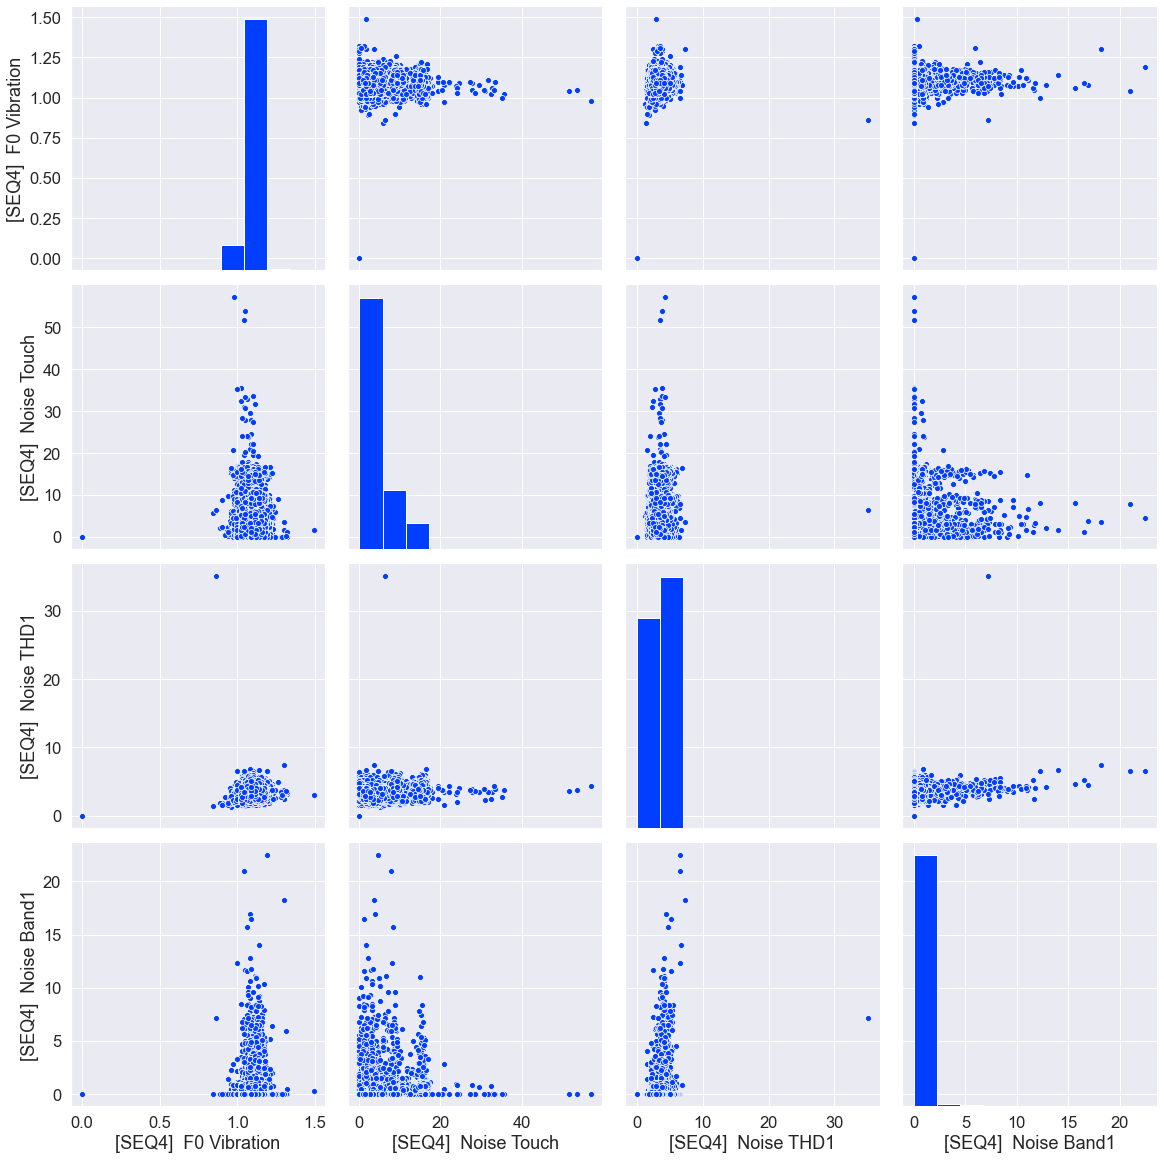

In [90]:
plt.style.use('dark_background') 
sns.set(style="darkgrid",palette="bright", font_scale=1.5) 
sns.pairplot(SEQ4_df, height=4)

##### 주파수별로 상관관계를 확인했을 때, 약한 선형관계를 보이거나 거의 관계가 없음이 나타났다.
##### 이로써, Vibration과 Noise의 선형적인 관계는 거의 없다고 볼 수 있다.